# Menyiapkan Library dan Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('drive/My Drive/Datasets')
os.listdir('.')

['iris.csv', 'heart.csv', 'pima-indians-diabetes.csv', 'sonar.csv']

# EDA

In [3]:
dataset = pd.read_csv('iris.csv')

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

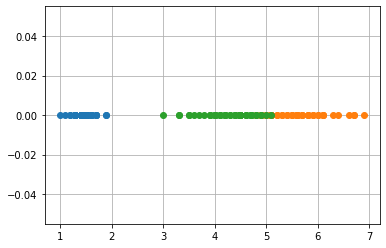

In [8]:
iris_setosa = dataset.loc[dataset['Species'] == 'Iris-setosa']
iris_verginica = dataset.loc[dataset['Species'] == 'Iris-virginica']
iris_versicolor = dataset.loc[dataset['Species'] == 'Iris-versicolor']

plt.plot(iris_setosa['PetalLengthCm'], np.zeros_like(iris_setosa['SepalLengthCm']), 'o')
plt.plot(iris_verginica['PetalLengthCm'], np.zeros_like(iris_verginica['SepalLengthCm']), 'o')
plt.plot(iris_versicolor['PetalLengthCm'], np.zeros_like(iris_versicolor['SepalLengthCm']), 'o')
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


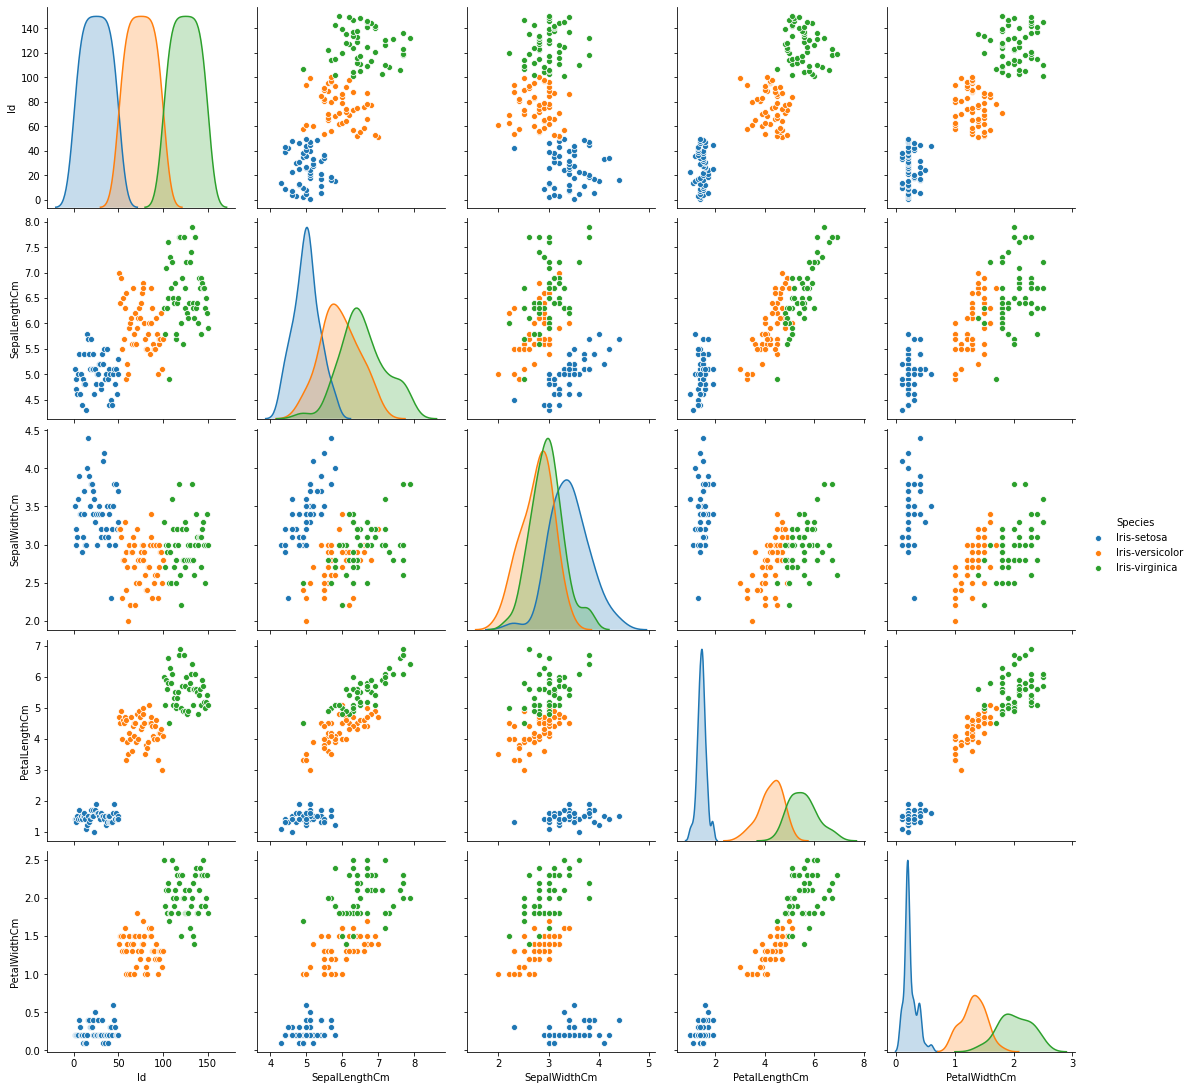

In [9]:
sb.pairplot(dataset, hue='Species', size=3)
plt.show()

# Feature Engineering

In [10]:
# memisahkan data feature dan label
feature = dataset.drop(['Id', 'Species'], axis=1)
label = dataset['Species']

In [11]:
# melakukan scalling data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

feature_scaled = scaler.fit_transform(feature.values)

In [12]:
# memisahkan data train dan test pada masing-masing data feature dan label
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.15, random_state=10)

# Assignment 6

1. Untuk algoritma Random Forest, gunakan nilai estimator:
  * 50
  * 100
  * 200

  Bandingkanlah hasilnya dan apabila hasil accuracy dari masing-masing hyperparameter berubah, coba simpulkan alasannya!

2. Untuk algoritma SVM, gunakan kernel:
  * Polynomial
  * Linear

  Dan gunakan juga LinearSVC menggunakan linear kernel.

  Hint: https://scikit-learn.org/stable/modules/svm.html

  Bandingkanlah hasilnya dan apabila hasil accuracy dari masing-masing hyperparameter berubah, coba simpulkan alasannya!

3. Untuk algoritma k-NN, carilah nilai *k* yang terbaik dari nilai 1, 3, 5, 7, 9, 11, 13, dan 15.

# Jawaban No. 1

## Training dan Evaluasi Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

n_estimatr = [50, 100, 200, 300]
for n in n_estimatr:
  rf_model = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features='sqrt')
  rf_model.fit(feature_train, label_train)

  prediction = rf_model.predict(feature_test)

  print(f'Nilai akurasi data test dengan n_estimator = {n}:')
  print('Accuracy of RandomForestClassifier on test set: {:.2f}'.format(rf_model.score(feature_test, label_test)))
  print('f1_score \t\t:', round(f1_score(label_test, prediction, average='macro'), 2))
  print('precision_score \t:', round(precision_score(label_test, prediction, average='macro'), 2))
  print('recall_score \t\t:', round(recall_score(label_test, prediction, average='macro'), 2))
  print('\n')

Nilai akurasi data test dengan n_estimator = 50:
Accuracy of RandomForestClassifier on test set: 1.00
f1_score 		: 1.0
precision_score 	: 1.0
recall_score 		: 1.0


Nilai akurasi data test dengan n_estimator = 100:
Accuracy of RandomForestClassifier on test set: 1.00
f1_score 		: 1.0
precision_score 	: 1.0
recall_score 		: 1.0


Nilai akurasi data test dengan n_estimator = 200:
Accuracy of RandomForestClassifier on test set: 1.00
f1_score 		: 1.0
precision_score 	: 1.0
recall_score 		: 1.0


Nilai akurasi data test dengan n_estimator = 300:
Accuracy of RandomForestClassifier on test set: 1.00
f1_score 		: 1.0
precision_score 	: 1.0
recall_score 		: 1.0




## Kesimpulan:
- Dengan membuat perubahan nilai hyperparameter pada n_estimator dengan nilai 50, 100, 200, dan 300 maka nilai f1, precision dan reacall tidak mengalami perubahan.
- Berarti dengan nilai n_estimator 50, 100, 200, 300 model telah berjalan dengan baik dengan hasil yang akurat.
- Berdasarkan hasil evaluasi diatas maka model RandomForesClassifier dengan  nilai n_estimator 50, 100, 200 dan 300 merupakan model yang terbaik pada kasus tersebut.

# Jawaban No. 2

## Training dan Evaluasi Model

In [14]:
# melatih model dengan algoritma SCV dengan kernel 'linear'
from sklearn.svm import SVC
svc_linear = SVC(kernel = "linear")
svc_linear.fit(feature_train, label_train)
prediction = svc_linear.predict(feature_test)

print('Accuracy of SVC (Linear) classifier on test set: {:.2f}'.format(svc_linear.score(feature_test, label_test)))
print('f1_score \t\t:', round(f1_score(label_test, prediction, average='macro'), 2))
print('precision_score \t:', round(precision_score(label_test, prediction, average='macro'), 2))
print('recall_score \t\t:', round(recall_score(label_test, prediction, average='macro'), 2))

Accuracy of SVC (Linear) classifier on test set: 0.96
f1_score 		: 0.95
precision_score 	: 0.95
recall_score 		: 0.96


In [15]:
# melatih model dengan algoritma SCV dengan kernel 'polynomial'
from sklearn.svm import SVC
svc_poly = SVC(kernel = "poly")
svc_poly.fit(feature_train, label_train)
prediction = svc_poly.predict(feature_test)

print('Accuracy of SVC (Polynomial) classifier on test set: {:.2f}'.format(svc_poly.score(feature_test, label_test)))
print('f1_score \t\t:', round(f1_score(label_test, prediction, average='macro'), 2))
print('precision_score \t:', round(precision_score(label_test, prediction, average='macro'), 2))
print('recall_score \t\t:', round(recall_score(label_test, prediction, average='macro'), 2))

Accuracy of SVC (Polynomial) classifier on test set: 0.96
f1_score 		: 0.95
precision_score 	: 0.97
recall_score 		: 0.94


In [20]:
# melatih model dengan algoritma LinearSCV
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(feature_train, label_train)
prediction = lin_svc.predict(feature_test)

print('Accuracy of SVC (Polynomial) classifier on test set: {:.2f}'.format(lin_svc.score(feature_test, label_test)))
print('f1_score \t\t:', round(f1_score(label_test, prediction, average='macro'), 2))
print('precision_score \t:', round(precision_score(label_test, prediction, average='macro'), 2))
print('recall_score \t\t:', round(recall_score(label_test, prediction, average='macro'), 2))

Accuracy of SVC (Polynomial) classifier on test set: 0.96
f1_score 		: 0.95
precision_score 	: 0.95
recall_score 		: 0.96


## Kesimpulan:
- Berdasarkan evaluasi model yang dilakukan baik hasil SVC dengan kernel 'linear', dan 'polynomial' dibandingkan Linear SVC sama - sama menghasilkan akurasi (f1_score, precision_score dan recall_score) yang hampir sama hanya selisih sekitar 0.01-0.03 dan perubahannya tidak terlalu signifikan.
- Dari model SVC ('linear' dan 'poly') dan LinearSVC tersebut sama-sama memiliki akurasi yang bagus atau model yang optimal karena akurasinya hampir mendekati nilai 1.

# Jawaban No. 3

## Training dan Evaluasi Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

neighbrs = [1, 3, 5, 7, 9, 11, 13, 15]

max_n_neighbors = None
max_f1_score = 0
max_precision_score = 0
max_recall_score = 0


for n in neighbrs:
  kn_model = KNeighborsClassifier(n_neighbors=n)
  kn_model.fit(feature_train, label_train)
  prediction = kn_model.predict(feature_test)

  f1 = round(f1_score(label_test, prediction, average='macro'), 2)
  precision = round(precision_score(label_test, prediction, average='macro'), 2)
  recall = round(recall_score(label_test, prediction, average='macro'), 2)

  if f1 > max_f1_score and precision > max_precision_score and recall > max_recall_score:
    max_f1_score = f1
    max_precision_score = precision
    max_recall_score = recall
    max_n_neighbors = n

# mencetak nilai k terbaik besaerta nilai f1_score, precision dan recall_scorenya
print(f'Nilai f1_score, precision_score dan recall_score terbaik dipreoleh oleh k = {n} dengan nilai: ')
print(f'- f1_score \t\t: {f1}')
print(f'- precision_score \t: {precision}')
print(f'- recall_score \t\t: {recall}')

Nilai f1_score, precision_score dan recall_score terbaik dipreoleh oleh k = 15 dengan nilai: 
- f1_score 		: 1.0
- precision_score 	: 1.0
- recall_score 		: 1.0
